In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# @title Imports
# imports
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# @title Data preprocessing
data = np.loadtxt("/content/drive/MyDrive/PRNN/A2/multi_class_classification_data_group_5_train.txt", skiprows=1, dtype='float')
d=25;
X_original=data[:,0:d]
print(np.shape(X_original))
Y_original=data[:,d:d+1]
def one_hot_encode(labels, num_classes):
    """
    Perform one-hot encoding on categorical labels.

    Args:
    - labels: Array of categorical labels
    - num_classes: Total number of classes

    Returns:
    - one_hot_labels: One-hot encoded labels
    """
    num_samples = len(labels)
    one_hot_labels = np.zeros((num_samples, num_classes))
    for i in range(num_samples):
        one_hot_labels[i, int(labels[i])] = 1  # Convert label to integer
    return one_hot_labels

# Example usage
num_classes = len(np.unique(Y_original))
one_hot_y = one_hot_encode(Y_original, num_classes)
# Define proportions for train, validation, and test sets
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 1-train_ratio-val_ratio

# Calculate the sizes of each set
num_samples = len(data)
num_train = int(train_ratio * num_samples)
num_val = int(val_ratio * num_samples)
num_test = num_samples - num_train - num_val

# Split the data into train, validation, and test sets
X_train, y_train = data[:num_train, :-1], data[:num_train, -1:]


max_valst = np.max(X_train, axis=0)
min_valst = np.min(X_train, axis=0)
X_train = 2 * ((X_train - min_valst) / (max_valst - min_valst)) - 1


y_train=one_hot_encode(y_train, num_classes)
X_val, y_val = data[num_train:num_train+num_val, :-1], data[num_train:num_train+num_val, -1:]
max_valsv = np.max(X_val, axis=0)
min_valsv = np.min(X_val, axis=0)

# Step 2: Normalize each feature
X_val = 2 * ((X_val - min_valsv) / (max_valsv - min_valsv)) - 1
y_val=one_hot_encode(y_val, num_classes)
print(np.max(X_val))

print(np.min(X_val))
X_test, y_test = data[-num_test:, :-1], data[-num_test:, -1:]
y_test=np.squeeze(y_test)
X_test = 2 * ((X_val - np.min(X_test)) / (np.max(X_test) - np.min(X_test))) - 1
print("Shape of X_train_flat:", X_train.shape)
print("Shape of X_val_flat:", X_val.shape)
print("Shape of y_train_onehot:", y_train.shape)
print("Shape of y_val_onehot:", y_val.shape)
print("Shape of y_test_onehot:", y_test.shape)
#y_test=one_hot_encode(y_test, num_classes)


(70000, 25)


<ipython-input-17-bb7d56e52303>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  one_hot_labels[i, int(labels[i])] = 1  # Convert label to integer


1.0
-1.0
Shape of X_train_flat: (56000, 25)
Shape of X_val_flat: (7000, 25)
Shape of y_train_onehot: (56000, 10)
Shape of y_val_onehot: (7000, 10)
Shape of y_test_onehot: (7000,)


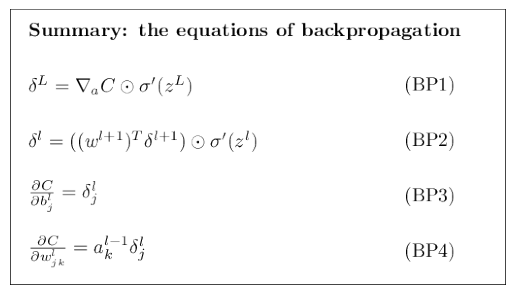

In [18]:
# @title Equations used for back propagation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('/content/drive/MyDrive/PRNN/A2/tikz21.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()


Epoch 1/500, Training Loss: 2.3019938733906873, Validation Loss: 2.3028581882912276
Epoch 2/500, Training Loss: 2.3018665998432093, Validation Loss: 2.3028951694896986
Epoch 3/500, Training Loss: 2.301850191979791, Validation Loss: 2.3028972330966924
Epoch 4/500, Training Loss: 2.3018460776035194, Validation Loss: 2.3028951744063377
Epoch 5/500, Training Loss: 2.3018434392269382, Validation Loss: 2.302892455972126
Epoch 6/500, Training Loss: 2.30184075552822, Validation Loss: 2.3028894029824922
Epoch 7/500, Training Loss: 2.3018377956776725, Validation Loss: 2.3028858718265486
Epoch 8/500, Training Loss: 2.30183406338352, Validation Loss: 2.3028820389745857
Epoch 9/500, Training Loss: 2.3018300445921622, Validation Loss: 2.302877736108286
Epoch 10/500, Training Loss: 2.3018258719013627, Validation Loss: 2.3028728972834984
Epoch 11/500, Training Loss: 2.301821478772569, Validation Loss: 2.302867412356517
Epoch 12/500, Training Loss: 2.3018160235921634, Validation Loss: 2.302861157345013

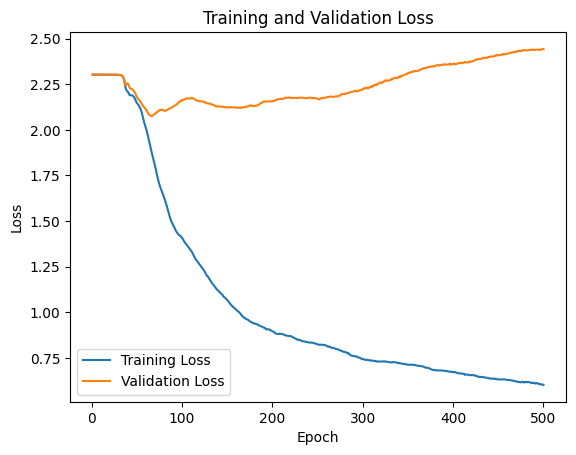

Overall Accuracy: 0.10357142857142858
Class-wise Accuracy: {0.0: 0.0, 1.0: 0.0070921985815602835, 2.0: 0.1376281112737921, 3.0: 0.12994350282485875, 4.0: 0.3931847968545216, 5.0: 0.001375515818431912, 6.0: 0.008695652173913044, 7.0: 0.11918604651162791, 8.0: 0.0, 9.0: 0.20953757225433525}
Confusion Matrix:
[[  0   2  78 113 252   3   3  84   0 122]
 [  0   5  99 108 288   3   7  90   0 105]
 [  0   2  94 109 255   1   5 105   0 112]
 [  0   0  98  92 268   1   9 108   0 132]
 [  1   2 103 114 300   0  10 108   0 125]
 [  1   2  87 114 302   1   9  89   0 122]
 [  0   1 106 110 255   3   6  80   0 129]
 [  0   2  93 103 256   2  12  82   0 138]
 [  0   0  89 110 264   2  10  90   0 122]
 [  0   0  90  99 258   1   5  94   0 145]]
Class-wise F1 Scores: [0.         0.01386963 0.11604938 0.10337079 0.1733603  0.00268817
 0.0156658  0.1013597  0.         0.14917695]


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network class
class MLP:
    def __init__(self, layer_sizes, activations, learning_rate=0.01, regularization_strength=0.000001, loss='cross_entropy'):
        self.layer_sizes = layer_sizes
        self.activations = activations
        self.learning_rate = learning_rate
        self.regularization_strength = regularization_strength
        self.loss = loss
        self.num_layers = len(layer_sizes)

        # Initialize weights and biases for each layer
        self.weights = [np.random.randn(layer_sizes[i], layer_sizes[i-1]) * 0.01 for i in range(1, self.num_layers)]
        self.biases = [np.zeros((layer_sizes[i], 1)) for i in range(1, self.num_layers)]

    def forward(self, X):
        # Forward pass through the network
        self.activations_cache = [X]
        self.weighted_inputs = []
        for i in range(self.num_layers - 1):
            Z = np.dot(self.weights[i], self.activations_cache[-1]) + self.biases[i]
            self.weighted_inputs.append(Z)
            if self.activations[i] == 'relu':
                A = self.relu(Z)
            elif self.activations[i] == 'sigmoid':
                A = self.sigmoid(Z)
            elif self.activations[i] == 'softmax':
                A = self.softmax(Z)
            self.activations_cache.append(A)

        return self.activations_cache[-1]

    def backward(self, X, y):
        m = X.shape[1]
        dA = self.activations_cache[-1] - y

        for i in range(self.num_layers - 2, -1, -1):
            if self.activations[i] == 'relu':
                dZ = dA * self.relu_derivative(self.weighted_inputs[i])
            elif self.activations[i] == 'sigmoid':
                dZ = dA * self.sigmoid_derivative(self.weighted_inputs[i])
            elif self.activations[i] == 'softmax':
                dZ = dA  # For softmax, derivative of loss w.r.t. Z is A - Y

            dW = np.dot(dZ, self.activations_cache[i].T) / m + (self.regularization_strength / m) * self.weights[i]
            db = np.sum(dZ, axis=1, keepdims=True) / m
            dA = np.dot(self.weights[i].T, dZ)

            # Update weights and biases
            self.weights[i] -= self.learning_rate * dW
            self.biases[i] -= self.learning_rate * db

    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size):
        # Lists to store training and validation loss
        self.training_losses = []
        self.validation_losses = []

        # Training loop
        for epoch in range(epochs):
            for i in range(0, X_train.shape[0], batch_size):
                X_batch = X_train[i:i+batch_size].T
                y_batch = y_train[i:i+batch_size].T

                # Forward pass
                output_probs = self.forward(X_batch)

                # Backward pass
                self.backward(X_batch, y_batch)

            # Compute training loss
            training_loss = self.compute_loss(y_batch, output_probs)
            self.training_losses.append(training_loss)

            # Compute validation loss
            val_output_probs = self.forward(X_val.T)
            validation_loss = self.compute_loss(y_val.T, val_output_probs)
            self.validation_losses.append(validation_loss)

            # Print training and validation loss
            print(f"Epoch {epoch+1}/{epochs}, Training Loss: {training_loss}, Validation Loss: {validation_loss}")

        # Plot training and validation loss
        plt.plot(range(1, epochs + 1), self.training_losses, label='Training Loss')
        plt.plot(range(1, epochs + 1), self.validation_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()



    def predict(self, X):
        # Make predictions
        output_probs = self.forward(X.T)
        return np.argmax(output_probs, axis=0)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=0, keepdims=True))
        return exp_values / np.sum(exp_values, axis=0, keepdims=True)

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def cross_entropy_loss(self, y_true, y_pred):
        return -np.sum(y_true * np.log(y_pred + 1e-15)) / y_true.shape[1]

    def squared_loss(self, y_true, y_pred):
        return np.sum((y_true - y_pred) ** 2) / (2 * y_true.shape[1])

    def compute_loss(self, y_true, y_pred):
        if self.loss == 'cross_entropy':
            return self.cross_entropy_loss(y_true, y_pred)
        elif self.loss == 'squared':
            return self.squared_loss(y_true, y_pred)

    def evaluate(self, X, y):
        # Make predictions
        y_pred = self.predict(X)

        # Calculate overall accuracy
        accuracy = np.mean(y_pred == y)

        # Calculate class-wise accuracy
        class_accuracy = {}
        for i in np.unique(y):
            idx = (y == i)
            class_accuracy[i] = np.mean(y_pred[idx] == y[idx])

        # Calculate confusion matrix
        cm = np.zeros((10, 10), dtype=int)
        for i in range(len(y)):
            cm[int(y[i]), int(y_pred[i])] += 1  # Convert to integers for indexing

        # Calculate class-wise F1 score
        f1_scores = np.zeros(10)
        for i in range(10):
            tp = cm[i, i]
            fp = np.sum(cm[:, i]) - tp
            fn = np.sum(cm[i, :]) - tp
            precision = tp / (tp + fp + 1e-15)
            recall = tp / (tp + fn + 1e-15)
            f1_scores[i] = 2 * (precision * recall) / (precision + recall + 1e-15)

        return accuracy, class_accuracy, cm, f1_scores

layer_sizes = [X_train.shape[1], 128,64, num_classes]  # Input size, hidden layer size, output size
activations = ['relu', 'relu','softmax']  # Activation functions for each layer
learning_rate = 0.05
epochs = 500
batch_size = 128
regularization_strength=0.01
model = MLP(layer_sizes, activations, learning_rate,regularization_strength)
model.train(X_train, y_train, X_val, y_val, epochs, batch_size)
accuracy, class_accuracy, cm, f1_scores = model.evaluate(X_test, y_test)

print("Overall Accuracy:", accuracy)
print("Class-wise Accuracy:", class_accuracy)
print("Confusion Matrix:")
print(cm)
print("Class-wise F1 Scores:", f1_scores)


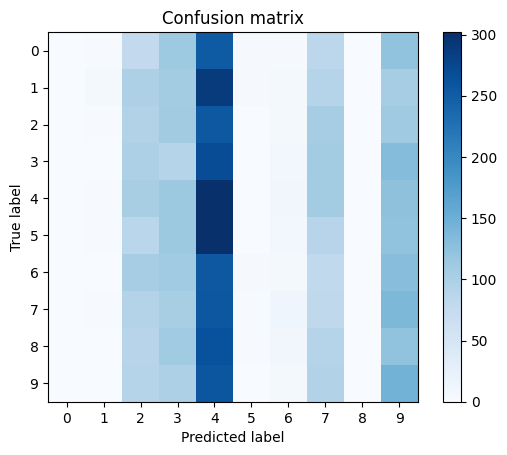

In [34]:
def plot_confusion_matrix(cm):
    """
    Plot the confusion matrix.

    Args:
    - cm (ndarray): Confusion matrix.
    """
    num_classes = cm.shape[0]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


num_classes = 10
plot_confusion_matrix(cm)